In [5]:
import pandas as pd
import os

FILE_NAME = 'global_bleaching_environmental.csv'
DATA_PATH = 'data/'
def load_data(data_path=DATA_PATH, file_name=FILE_NAME):
    csv_path = os.path.join(data_path, file_name)
    return pd.read_csv(csv_path, skiprows=6)

load_data()

,Site_ID,Sample_ID,Data_Source,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Reef_ID,Realm_Name,Ecoregion_Name,Country_Name,...,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Date,Site_Comments,Sample_Comments,Bleaching_Comments
0,2501,10324336,Donner,23.1630,-82.5260,Atlantic,-9999.0,Tropical Atlantic,Cuba and Cayman Islands,Cuba,...,5.0,0.0,0.00,0.74,7.25,0.18,2005-09-15,-9999.0,-9999.0,-9999.0
1,3467,10324754,Donner,-17.5750,-149.7833,Pacific,-9999.0,Eastern Indo-Pacific,Society Islands French Polynesia,French Polynesia,...,4.0,0.0,0.26,0.67,4.65,0.19,1991-03-15,The bleaching does not appear to have gained ...,The bleaching does not appear to have gained ...,-9999.0
2,1794,10323866,Donner,18.3690,-64.5640,Atlantic,-9999.0,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United Kingdom,...,7.0,0.0,0.00,1.04,11.66,0.26,2006-01-15,-9999.0,-9999.0,-9999.0
3,8647,10328028,Donner,17.7600,-64.5680,Atlantic,-9999.0,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,4.0,0.0,0.00,0.75,5.64,0.20,2006-04-15,-9999.0,-9999.0,-9999.0
4,8648,10328029,Donner,17.7690,-64.5830,Atlantic,-9999.0,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,5.0,0.0,0.00,0.92,6.89,0.25,2006-04-15,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41356,15446,10310562,Reef_Check,-8.3651,116.0844,Pacific,116.5.3.9E.8.21.54.4S,Central Indo-Pacific,Lesser Sunda Islands and Savu Sea,Indonesia,...,8.0,1.0,2.09,1.49,9.00,0.63,2019-05-28,-9999.0,-9999.0,-9999.0
41357,15456,10310527,Reef_Check,-8.3473,116.0503,Pacific,116.3.1.1E.8.20.50.2S,Central Indo-Pacific,Lesser Sunda Islands and Savu Sea,Indonesia,...,8.0,1.0,2.00,1.29,8.01,0.65,2019-05-16,-9999.0,-9999.0,-9999.0
41358,15456,10310527,Reef_Check,-8.3473,116.0503,Pacific,116.3.1.1E.8.20.50.2S,Central Indo-Pacific,Lesser Sunda Islands and Savu Sea,Indonesia,...,8.0,1.0,2.00,1.29,8.01,0.65,2019-05-16,-9999.0,-9999.0,-9999.0
41359,15457,10310536,Reef_Check,-8.3445,116.0629,Pacific,116.3.46.548E.8.20.40.236S,Central Indo-Pacific,Lesser Sunda Islands and Savu Sea,Indonesia,...,8.0,1.0,2.00,1.29,8.01,0.65,2019-05-29,-9999.0,-9999.0,-9999.0


In [6]:
reefs_data = load_data()
reefs_data.count().head()

Site_ID              41361
Sample_ID            41361
Data_Source          41361
Latitude_Degrees     41361
Longitude_Degrees    41361
dtype: int64

In [15]:
#data cleaning
reefs_data.drop(reefs_data.index[reefs_data['Distance_to_Shore'] == -9999.000000], inplace = True)
reefs_data.drop(reefs_data.index[reefs_data['Turbidity'] == -9999.000000], inplace = True)
reefs_data.drop(reefs_data.index[reefs_data['Depth_m'] == -9999.000000], inplace = True)
reefs_data.drop(reefs_data.index[reefs_data['Percent_Cover'] == -9999.000000], inplace = True)
reefs_data.drop(reefs_data.index[reefs_data['Percent_Bleaching'] == -9999.000000], inplace = True)
reefs_data.drop(reefs_data.index[reefs_data['Temperature_Kelvin'] == -9999.000000], inplace = True)
reefs_data.drop(reefs_data.index[reefs_data['Temperature_Mean'] == -9999.000000], inplace = True)
reefs_data.drop(reefs_data.index[reefs_data['SSTA_Minimum'] == -9999.000000], inplace = True)

    
reefs_data.count().head()


Site_ID              22525
Sample_ID            22525
Data_Source          22525
Latitude_Degrees     22525
Longitude_Degrees    22525
dtype: int64

In [16]:
reefs_data['Ocean_Name'].value_counts()

Pacific         15137
Atlantic         4164
Indian           1860
Red Sea          1028
Arabian Gulf      336
Name: Ocean_Name, dtype: int64

In [17]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
reefs_data.describe()

,Site_ID,Sample_ID,Latitude_Degrees,Longitude_Degrees,Distance_to_Shore,Turbidity,Cyclone_Frequency,Date_Day,Date_Month,Date_Year,Depth_m,Percent_Cover,Percent_Bleaching,ClimSST,Temperature_Kelvin,Temperature_Mean,Temperature_Minimum,Temperature_Maximum,Temperature_Kelvin_Standard_Deviation,Windspeed,SSTA,SSTA_Standard_Deviation,SSTA_Mean,SSTA_Minimum,SSTA_Maximum,SSTA_Frequency,SSTA_Frequency_Standard_Deviation,SSTA_FrequencyMax,SSTA_FrequencyMean,SSTA_DHW,SSTA_DHW_Standard_Deviation,SSTA_DHWMax,SSTA_DHWMean,TSA,TSA_Standard_Deviation,TSA_Minimum,TSA_Maximum,TSA_Mean,TSA_Frequency,TSA_Frequency_Standard_Deviation,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean
count,22525.000000,2.252500e+04,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.0,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000,22525.000000
mean,5446.277248,1.031462e+07,3.900452,61.899487,2832.318038,0.078797,51.193801,16.104417,6.835694,2010.815627,6.505594,19.671852,3.049933,294.730906,301.261872,300.599256,296.101154,305.175473,1.576581,4.676448,0.257410,0.879298,0.0,-3.438698,3.497203,7.785133,5.080454,24.794128,5.449103,2.549118,3.177887,19.764970,2.114354,-1.066489,1.575514,-6.215898,2.836487,-1.718565,2.006679,1.899960,8.687480,1.165051,0.827611,1.470758,10.860589,0.591457
std,3347.441983,4.780070e+03,15.195387,96.684486,10888.868026,0.066368,6.402023,8.586545,3.000347,4.989606,3.401951,21.022188,10.809194,14.398434,2.035710,1.663385,2.745931,1.411727,0.726241,2.172808,0.791469,0.211164,0.0,0.610453,1.240508,5.940325,1.250947,6.750380,2.264336,3.618366,1.560360,10.057116,1.200630,1.589143,0.727922,2.392474,1.017116,1.038062,2.748434,0.751494,4.147558,1.727684,2.330526,1.124954,5.341867,0.955349
min,4.000000,1.029043e+07,-28.864500,-179.859400,3.680000,0.017600,19.860000,1.000000,1.000000,1998.000000,0.100000,0.000000,0.000000,262.150000,291.640000,294.300000,284.540000,301.250000,0.790000,0.000000,-4.260000,0.000000,0.0,-7.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.040000,0.000000,-18.850000,0.000000,-7.460000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3321.000000,1.031112e+07,-8.676000,-32.445100,97.950000,0.040500,47.900000,9.000000,4.000000,2006.000000,4.000000,1.250000,0.000000,298.650000,300.130000,299.950000,295.150000,304.390000,1.150000,3.000000,-0.220000,0.760000,0.0,-3.640000,2.850000,3.000000,4.130000,20.000000,4.000000,0.000000,2.350000,14.540000,1.450000,-1.950000,1.150000,-6.620000,2.310000,-1.860000,0.000000,1.410000,6.000000,1.000000,0.000000,1.010000,7.590000,0.330000
50%,5544.000000,1.031464e+07,5.799500,104.507800,253.340000,0.059500,49.880000,16.000000,7.000000,2011.000000,6.000000,12.500000,0.000000,301.040000,301.630000,301.030000,297.170000,305.220000,1.300000,5.000000,0.250000,0.860000,0.0,-3.320000,3.180000,7.000000,5.090000,25.000000,5.620000,1.230000,2.970000,18.160000,2.030000,-0.820000,1.300000,-5.580000,2.610000,-1.420000,1.000000,1.710000,8.000000,1.000000,0.000000,1.260000,9.640000,0.430000
75%,7307.000000,1.031863e+07,15.978500,123.519400,994.880000,0.084200,54.440000,23.000000,9.000000,2015.000000,10.000000,33.120000,0.750000,302.130000,302.690000,301.820000,297.800000,305.820000,1.760000,6.000000,0.740000,0.940000,0.0,-3.080000,3.700000,11.000000,6.010000,30.000000,6.430000,3.630000,3.550000,22.100000,2.440000,0.020000,1.760000,-4.780000,3.090000,-1.110000,3.000000,2.210000,10.000000,1.000000,0.810000,1.700000,12.680000,0.640000
max,15736.000000,1.03220

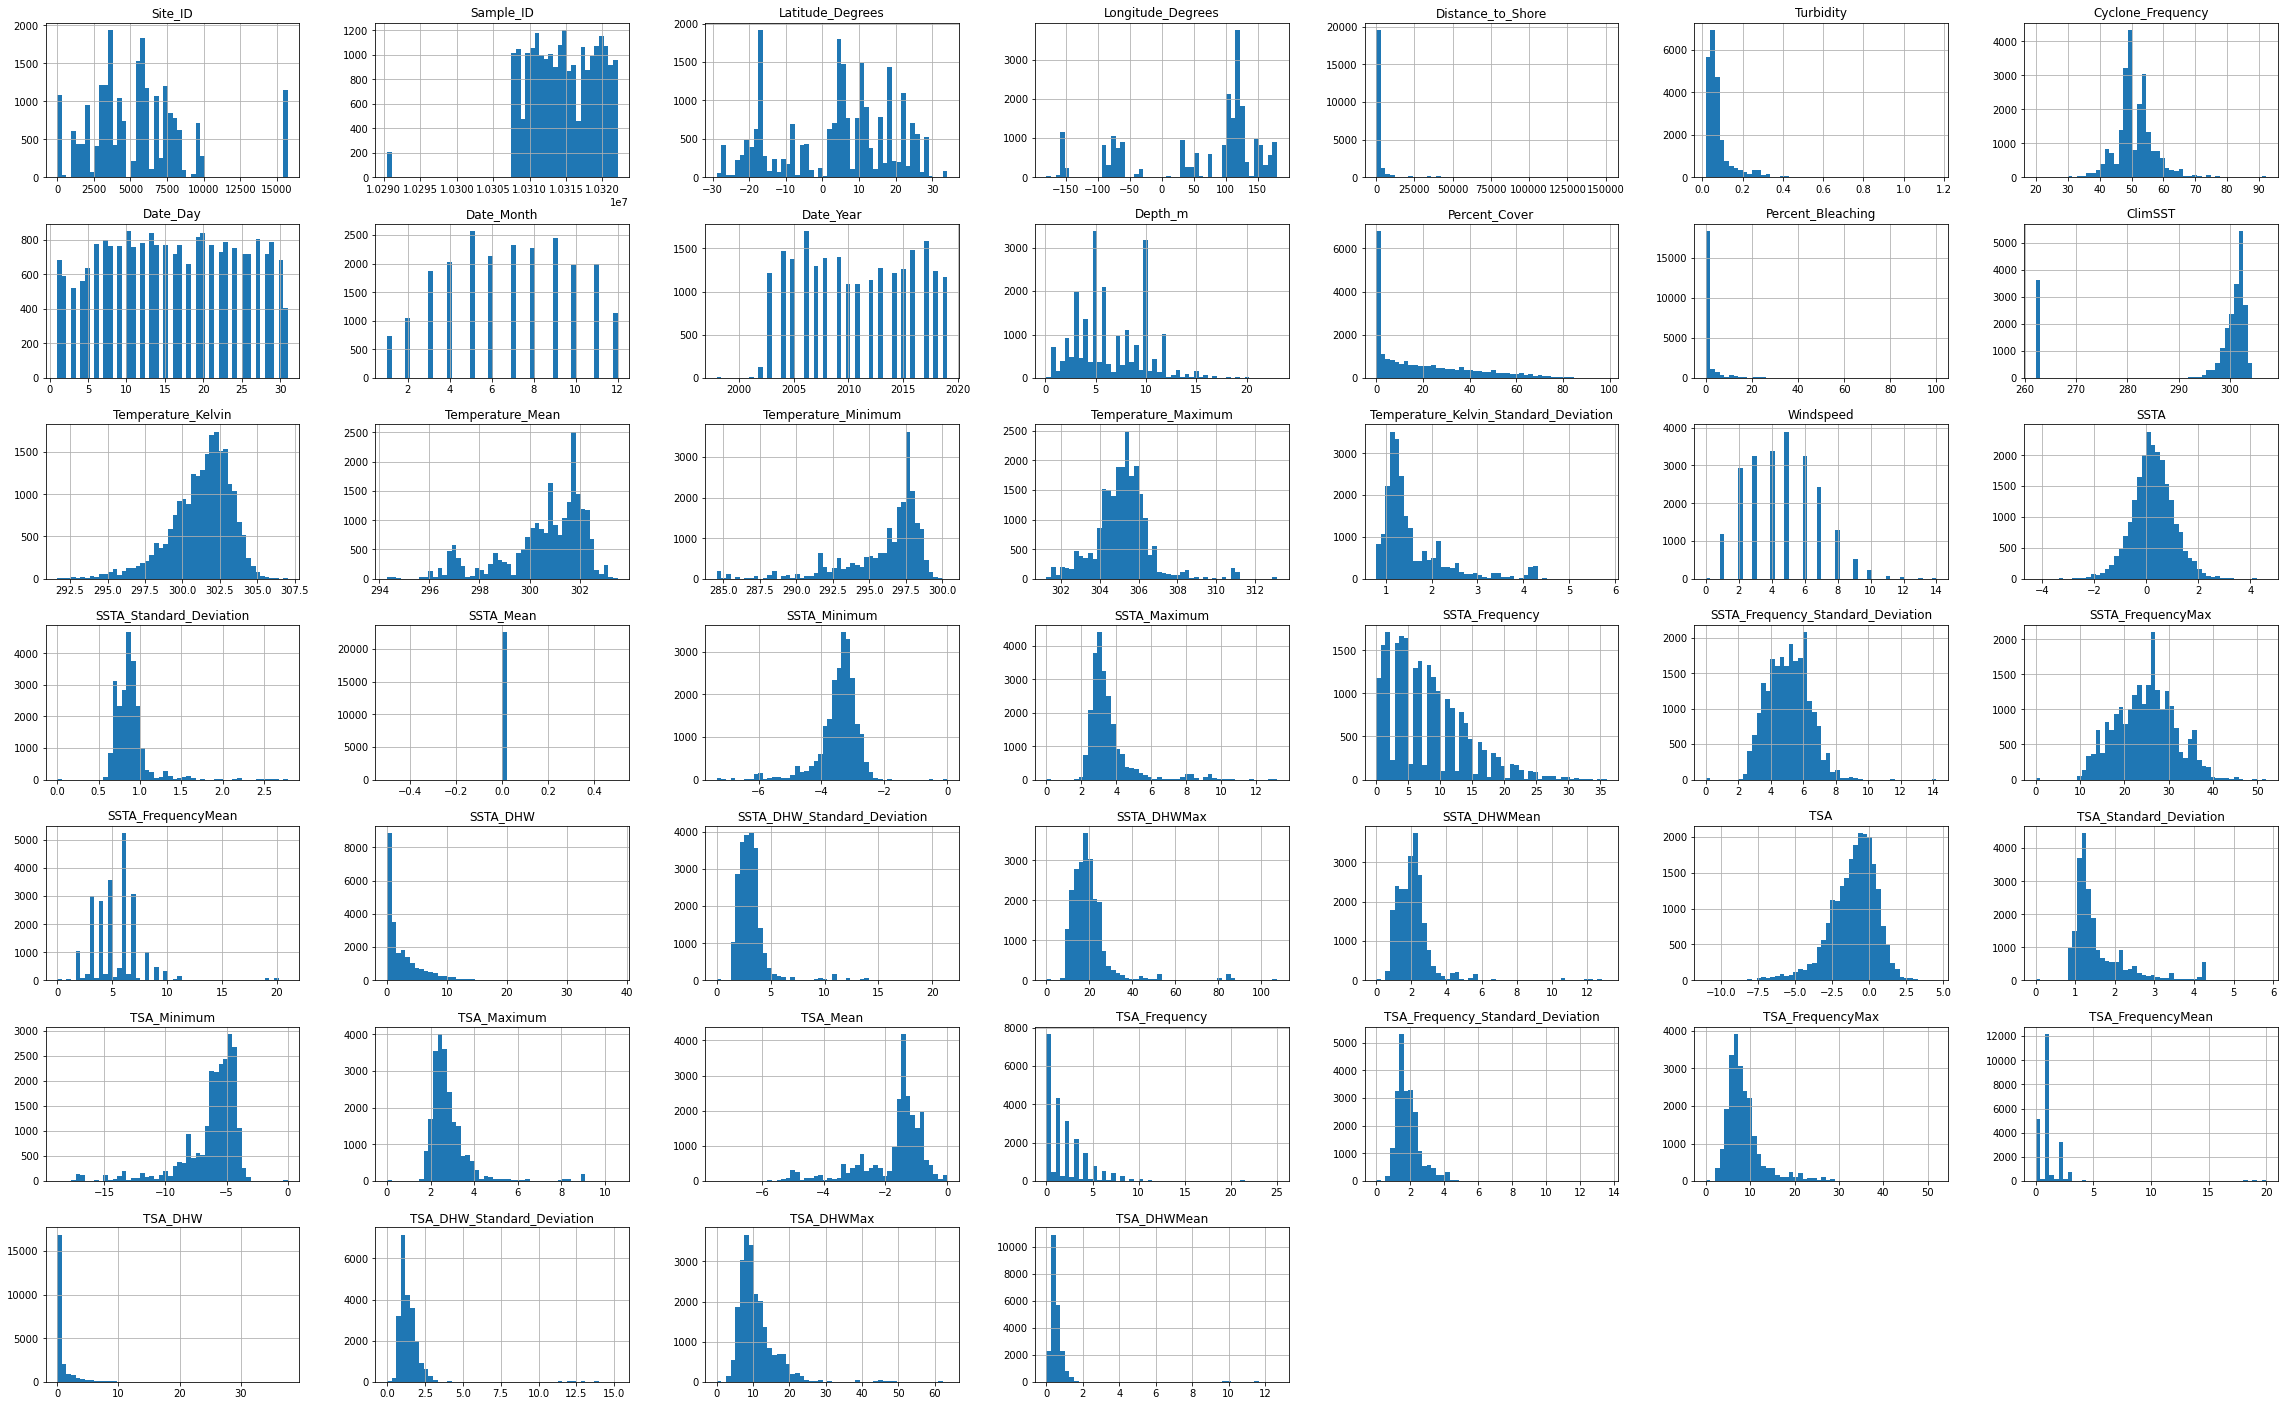

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

reefs_data.hist(bins=50, figsize=(40, 25))
plt.show()


In [19]:
from matplotlib import test
from sklearn.model_selection import train_test_split
#split DataFrame into 2 sets
train_set, test_set = train_test_split(reefs_data, test_size=0.2, random_state=42)


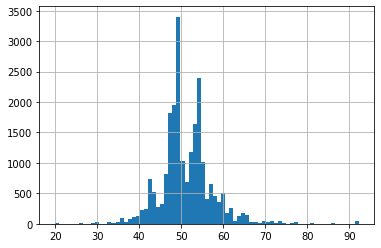

In [30]:
%matplotlib inline
reefs_data['Cyclone_Frequency'].hist(bins=75)
plt.show()


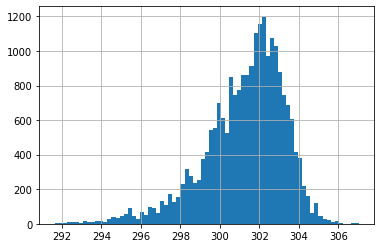

In [29]:
%matplotlib inline
reefs_data['Temperature_Kelvin'].hist(bins=75)
plt.show()